# Import data

In [ ]:
import pandas as pd
import numpy as np 
import os 
import sys 
import matplotlib.pyplot as plt 
from datetime import date, time

In [15]:
# Read data 
path = r'C:\Users\Usser\Desktop\Master\Donnés_France\Wind\data_2012-2020-Wind.csv'
# Data to df 
df = pd.read_csv(path).rename(columns={'DATE':'date','FF':'wind_speed','DD':'wind_direction'}) #To change column names
df = df.dropna(subset=['wind_speed', 'wind_direction']) # To eliminate NaN values

# Weibull distribution

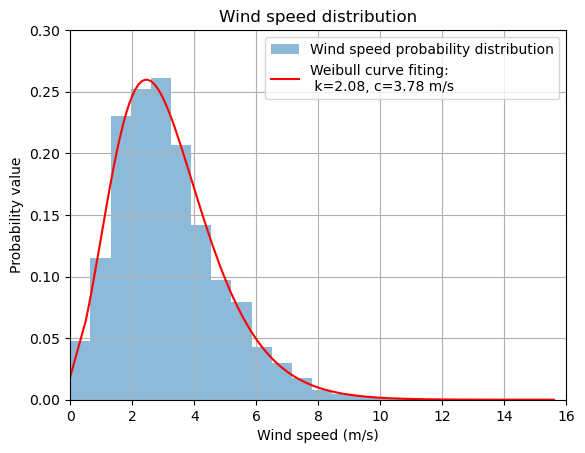

In [19]:
from scipy import stats
import matplotlib.pyplot as plt

# Only wind speed data
data = df['wind_speed'].sort_values(axis=0, ascending=True)

# Parameters of Weibull fir
k, b, c = stats.weibull_min.fit(data)  

# Plot
_ = plt.hist(data, bins=np.linspace(data.min(), data.max(), 25), density=True, alpha=0.5, label='Wind speed probability distribution');
plt.plot(data, stats.exponweib.pdf(data, *stats.exponweib.fit(data, 1, 1, scale=2, loc=0)), c='r', label='Weibull curve fiting: \n k=%1.2f, c=%1.2f m/s' %(k, c))

plt.title('Wind speed distribution')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability value')
plt.grid()
plt.xlim(0,16)
plt.ylim(0,0.30)
plt.legend()
plt.show()

# Wind rose

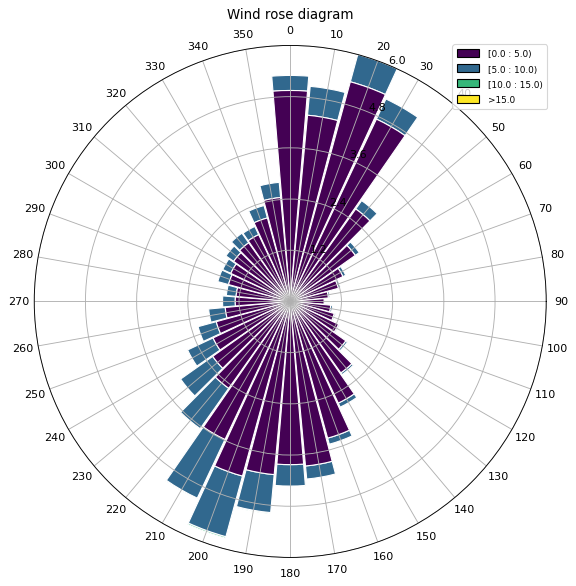

In [21]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df.wind_direction,
       df.wind_speed,
       normed=True,
       nsector= 36,opening=0.94, bins=np.arange(0, 20, 5),
       edgecolor='white')
ax.set_legend(loc = 'best')
ax.set_thetagrids(range(0,360,10),[90, 80, 70, 60, 50, 40, 30, 20, 10, 0, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100])
plt.title(f'Wind rose diagram')
plt.show()

# Analysis 

## Visualization by group 

In [27]:
# df : df of analysis
df = df.copy() 
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
# Eliminate columns
df.drop(columns=['date'], inplace=True)

In [28]:
df['date'] = df.index.date 
df['year'] = df.index.year
df['quarter'] = df.index.quarter 
df['month'] = df.index.month
df['dom'] = df.index.day # Day of Month 
df['dow'] = df.index.dayofweek 
df['doy'] = df.index.dayofyear 
df['weekday'] = df.index.day_name() 
df['woy'] = df.index.weekofyear
df['hour'] = df.index.hour

C:\Users\Usser\AppData\Local\Temp\ipykernel_19336\456444901.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['woy'] = df.index.weekofyear


## Hourly wind speed

Text(0.5, 1.0, 'Hourly Boxplot')

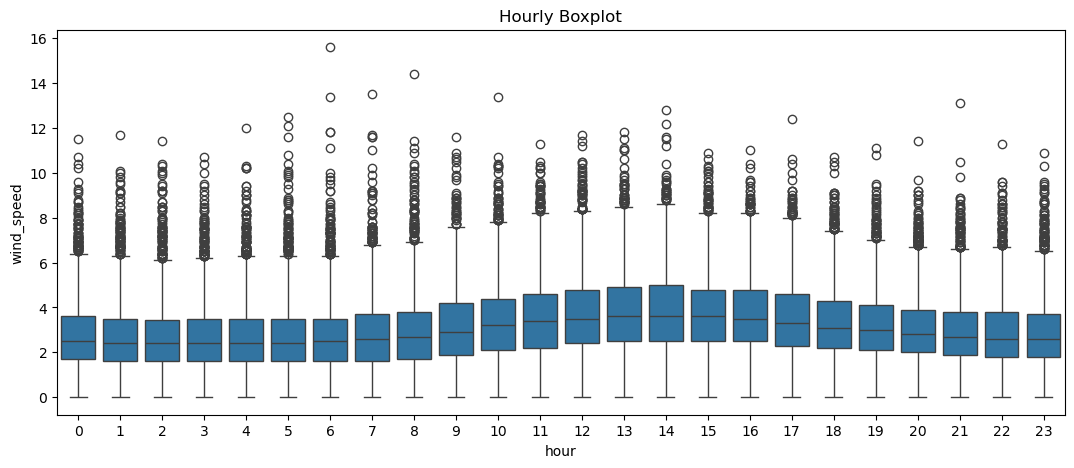

In [30]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,5))
sns.boxplot(x = 'hour', y = 'wind_speed',data=df) 
ax.set_title('Hourly Boxplot')

## Monthtly wind speed

Text(0.5, 1.0, 'Monthly Boxplot')

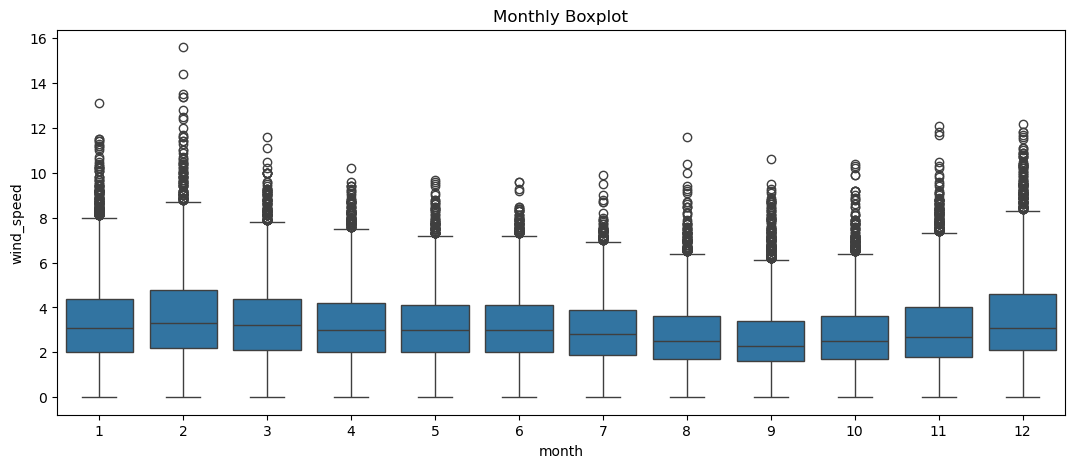

In [31]:
fig, ax = plt.subplots(figsize=(13,5))
sns.boxplot(x = 'month', y = 'wind_speed',data=df) 
ax.set_title('Monthly Boxplot')

## Yearly and hour wind speed

<AxesSubplot:title={'center':'Wind Speed - Daily Trends'}, xlabel='hour'>

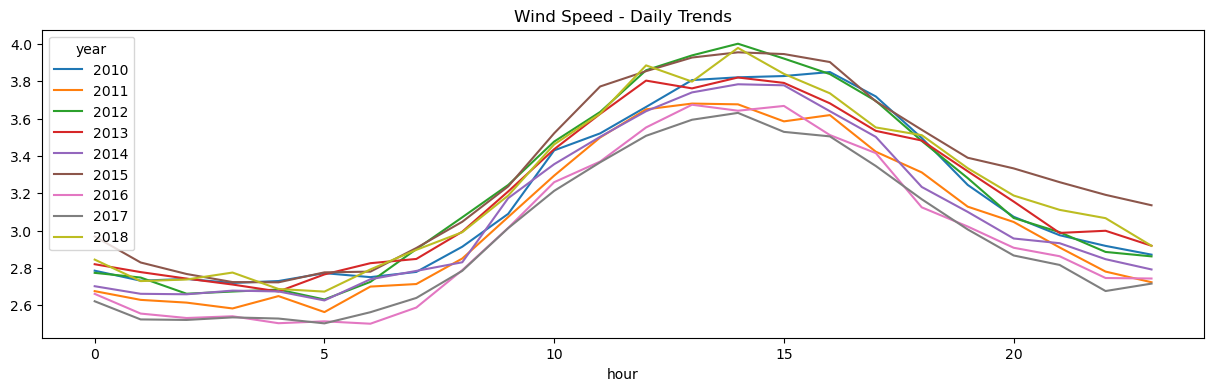

In [32]:
df2 = df.copy()
df2 = df2.pivot_table(index=df['hour'], columns = 'year', values = 'wind_speed', aggfunc='mean')
df2.head()
df2.plot(figsize=(15,4), title='Wind Speed - Daily Trends')
# weekends behavior is different from weekday behavior 